In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

Units used
- $x$, $X$ : meters
- $t$, $T$ : seconds
- $L$ : henry per meter
- $C$ : farad per meter
- $R$ : ohm per meter
- $G$ : siemens per meter

In [2]:
# Parameters
X = 150
T = 4.0
L = 1e-3
C = 0.01e-6
R = 0.03
G = 0.001e-6

c_squared = 1. / (L*C)
alpha = G / C
beta = R / L

In [3]:
# Discretization of spatial and temporal domains
K = 99
num_x_gridpoints = K + 1

# N = 999
# num_t_gridpoints = N + 1

delta_x = X / (num_x_gridpoints-1)
delta_t = 0.9*delta_x / numpy.sqrt(c_squared)

x_domain = numpy.array([0+k*delta_x for k in range(num_x_gridpoints)])

# t_domain = numpy.array([0+n*delta_t for n in range(num_t_gridpoints)])
t_domain = numpy.arange(0., T+delta_t, delta_t)
num_t_gridpoints = len(t_domain)
N = num_t_gridpoints - 1

A = 1. + 0.5 * (delta_t * (alpha + beta))
B = 1. - 0.5 * (delta_t * (alpha + beta))
E = c_squared * (delta_t**2) / (delta_x**2)
F = 2. - (2. * c_squared * delta_t**2 / delta_x**2) - (alpha * beta * delta_t**2)

In [4]:
# Initial conditions
def mu(x):
    return 0.

def get_u_k_1(u_k_0):
    rhs = 0.
    return u_k_0 + rhs*delta_t

In [5]:
# Boundary conditions
def nu_0(t):
#     t_start = 0.
#     t_end=0.75e-3/numpy.sqrt(10)
    t_start = 0.3
    t_end = 0.35
    
    if (t >= t_start) and (t <= t_end):
        return 1.0
    else:
        return 0.

def get_u_K_n(u_Kminus1_n):
    rhs = 0.
    return u_Kminus1_n + rhs*delta_x

In [6]:
# Container for voltages at various x and t
u = numpy.zeros((num_x_gridpoints, num_t_gridpoints))

In [7]:
# At n=0
n = 0
for k in range(num_x_gridpoints):
    u[k,0] = mu(x_domain[k])
del n, k

u[0,0] = nu_0(0)
u[K,0] = u[K-1,0]
u[:,1] = get_u_k_1(u[:,0])

In [8]:
# At n=1,2,...,N-1
for n in range(1,num_t_gridpoints-1):
    for k in range(1,num_x_gridpoints-1):
        # Update equation
        u[k,n+1] = (E*u[k-1,n] + F*u[k,n] + E*u[k+1,n] - B*u[k,n-1]) / A
        
    # Update values at k=0 and k=K according to boundary conditions
    u[0,n+1] = nu_0(t_domain[n])
    u[K,n+1] = get_u_K_n(u[K-1,n+1])
del n, k

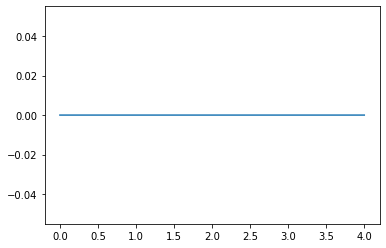

In [10]:
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(t_domain, u[0,:]);
# ax.plot(t_domain, u[K,:]);

pyplot.show()